LINEAR REGRESSION OF REVIEWS DATA SET

# 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
rev = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
rev.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Replace the missing values with 0.
rev.fillna(0, inplace=True)

# Determine the number of missing values.
rev.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [4]:
# View the metadata.
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Determine the descriptive statistics.
rev.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


Conclusion: Based on these statistics, we can infer that customers in this dataset vary widely in terms of age (ranging from 17 to 72 years old), income (between £12K and 112K), spending behavior, and loyalty points (25 to 6847) accumulation. However, further analysis and exploration would be needed to draw more specific conclusions or insights about customer behavior and loyalty point accumulation strategies.

# 2. Drop columns

In [6]:
# Drop unnecessary columns.
rev_new = rev.drop(['language', 'platform', 'product', 'review', 'education'], axis=1)

# View column names.
print(rev_new.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


# 3. Rename columns

In [7]:
# Rename columns 'remuneration' to 'income_per_y' and 'spending_score' to 'turtle_score'.
rev_new.rename(columns={'remuneration (k£)': 'income_per_y',
                        'spending_score (1-100)': 'turtle_score'},
               inplace=True)

# Display the updated DataFrame
print(rev_new)

      gender  age  income_per_y  turtle_score  loyalty_points  \
0       Male   18         12.30            39             210   
1       Male   23         12.30            81             524   
2     Female   22         13.12             6              40   
3     Female   25         13.12            77             562   
4     Female   33         13.94            40             366   
...      ...  ...           ...           ...             ...   
1995  Female   37         84.46            69            4031   
1996  Female   43         92.66             8             539   
1997    Male   34         92.66            91            5614   
1998    Male   34         98.40            16            1048   
1999    Male   32         92.66             8             479   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pret

# 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
rev_new.to_csv('reviews_new.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews_new = pd.read_csv('reviews_new.csv')

# View DataFrame.
print(reviews_new)

      gender  age  income_per_y  turtle_score  loyalty_points  \
0       Male   18         12.30            39             210   
1       Male   23         12.30            81             524   
2     Female   22         13.12             6              40   
3     Female   25         13.12            77             562   
4     Female   33         13.94            40             366   
...      ...  ...           ...           ...             ...   
1995  Female   37         84.46            69            4031   
1996  Female   43         92.66             8             539   
1997    Male   34         92.66            91            5614   
1998    Male   34         98.40            16            1048   
1999    Male   32         92.66             8             479   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pret

In [10]:
# Sense checking reviews DataF
reviews_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_per_y    2000 non-null   float64
 3   turtle_score    2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   summary         2000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 93.9+ KB


# 5. Linear regression

5a) spending vs loyalty

Specifing the independent and dependent variables.

In [11]:
# Import all the necessary packages.
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [12]:
# Specifing the independent and dependent variables.
# Dependent variable:
y = rev_new['loyalty_points']

#Independent variable:
X = rev_new['turtle_score']

In [13]:
# Determine correlation between variables
rev_new.corr()

,age,income_per_y,turtle_score,loyalty_points
age,1.000000,-0.005708,-0.224334,-0.042445
income_per_y,-0.005708,1.000000,0.005612,0.616065
turtle_score,-0.224334,0.005612,1.000000,0.672310
loyalty_points,-0.042445,0.616065,0.672310,1.000000


Initial correlation shows that income vs. loyalty points have 61% positive correlation, and turtle score vs. loyalty points have 67% positive correlation, what suggest it can be best fit for building model. Remaining variables have very weak or none correlation and could be rejected, but for certainty I will check age vs. loyalty points to prove no correlation.

In [14]:
# Adding a constant term to the independent variable.
X = sm.add_constant(X)

In [15]:
# Create the OLS model and summary.
model = sm.OLS(y, X).fit()

In [16]:
# Extract the estimated parameters, standard errors, and predicted values.
params = model.params
std_errors = model.bse
predicted_values = model.predict(X)

In [17]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficients': params,
                                 'Standard Errors': std_errors})
print(regression_table)

              Coefficients  Standard Errors
const           -75.052663        45.930554
turtle_score     33.061693         0.814419


In [18]:
# View the output.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.92e-263
Time:                        16:09:17   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -75.0527     45.931     -1.634   

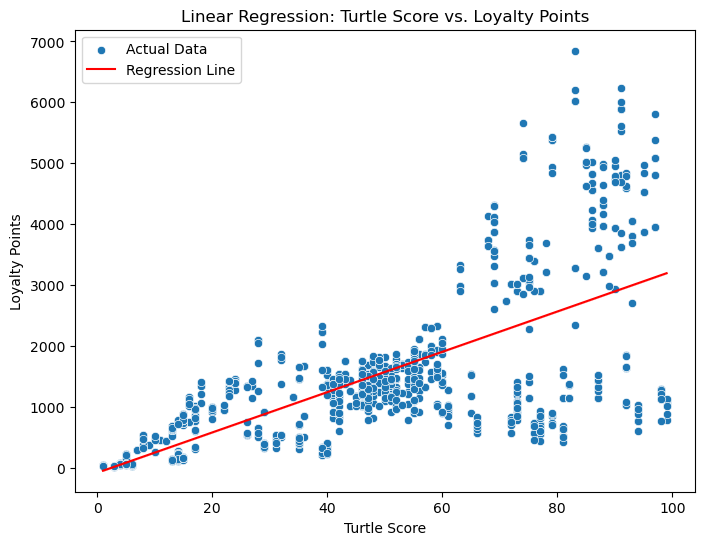

In [19]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='turtle_score', y='loyalty_points', data=rev_new, label='Actual Data')
sns.lineplot(x=rev_new['turtle_score'], y=predicted_values, color='red', label='Regression Line')
plt.title('Linear Regression: Turtle Score vs. Loyalty Points')
plt.xlabel('Turtle Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

In [20]:
# Obtaining predicted values
loyalty = LinearRegression()
loyalty.fit(rev_new[['turtle_score']], rev_new['loyalty_points'])

# Obtain predicted values
predicted_values = loyalty.predict(rev_new[['turtle_score']])

# Append the predicted values to the DataFrame
rev_new['predicted_loyalty'] = predicted_values

# Print the predicted values
print(rev_new[['turtle_score', 'loyalty_points', 'predicted_loyalty']])

      turtle_score  loyalty_points  predicted_loyalty
0               39             210        1214.353374
1               81             524        2602.944491
2                6              40         123.317497
3               77             562        2470.697718
4               40             366        1247.415067
...            ...             ...                ...
1995            69            4031        2206.204172
1996             8             539         189.440883
1997            91            5614        2933.561424
1998            16            1048         453.934429
1999             8             479         189.440883

[2000 rows x 3 columns]


In [21]:
# Extracting and plotting the residuals vs. x-values
loyalty.fit(rev_new[['turtle_score']], rev_new['loyalty_points'])
predicted_values = loyalty.predict(rev_new[['turtle_score']])

# Calculate residuals
residuals = rev_new['loyalty_points'] - predicted_values

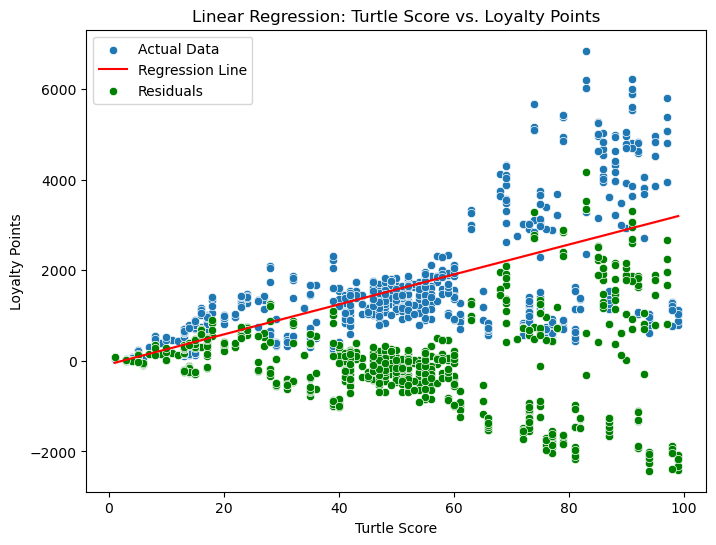

In [22]:
# Plot the graph with a regression line
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
sns.scatterplot(x='turtle_score', y='loyalty_points', data=rev_new, label='Actual Data')

# Regression line
sns.lineplot(x=rev_new['turtle_score'], y=predicted_values, color='red', label='Regression Line')

# Plot residuals against x-values
sns.scatterplot(x=rev_new['turtle_score'], y=residuals, color='green', label='Residuals')

plt.title('Linear Regression: Turtle Score vs. Loyalty Points')
plt.xlabel('Turtle Score')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

# Conclusion for linear regression for Spending Score (Turtle_score) vs. Loyalty Points

1. R-squared is 0.452, what indicates that 45.2% of the variability in loyalty_points is explained by turtle_score.
2. F-statistic is 1648, and the associated p-value is very close to zero (2.92e-263), suggesting that the model is statistically significant.
3. The p-value for "turtle_score" is very close to zero, indicating that "turtle_score" is likely a significant predictor.
4. The model appears to be statistically significant, as turtle_score has a statistically significant and positive effect on loyalty_points (low p-value).
5. The correlation coefficient is 0.672310, suggesting that individuals with higher turtle scores are more likely to have higher loyalty points. This strong positive correlation suggests that the turtle score is a good predictor of loyalty points, however plot of residuals vs. x-values siggests (in line with R-squared result) that approx. half of data may not be captured).

5b) income_per_y vs loyalty

In [23]:
# Specifing the independent and dependent variables.
# Dependent variable:
y = rev_new['loyalty_points']

#Independent Variable:
X = rev_new['income_per_y']

In [24]:
# Adding a constant term to the independent variable.
X = sm.add_constant(X)

In [25]:
# Create the OLS model and summary.
model = sm.OLS(y, X).fit()

In [26]:
# Extract the estimated parameters, standard errors, and predicted values.
params = model.params
std_errors = model.bse
predicted_values = model.predict(X)

In [27]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficients': params,
                                 'Standard Errors': std_errors})
print(regression_table)

              Coefficients  Standard Errors
const           -65.686513        52.170717
income_per_y     34.187825         0.977925


In [28]:
# View the output.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.43e-209
Time:                        16:09:23   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -65.6865     52.171     -1.259   

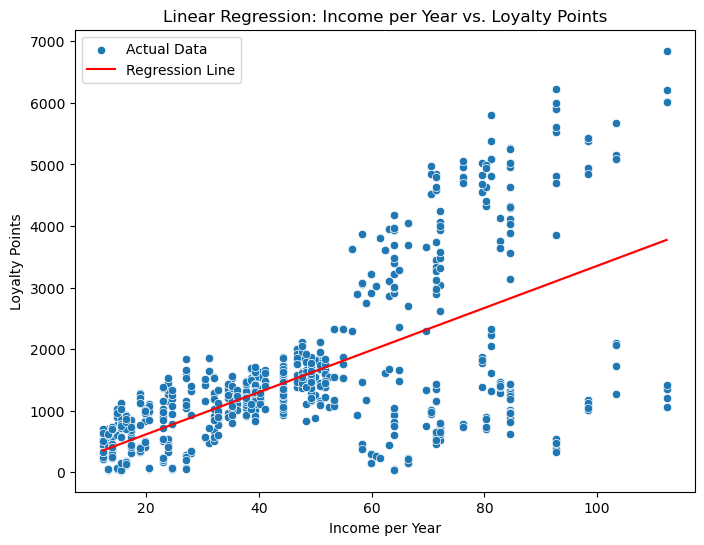

In [29]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_per_y', y='loyalty_points', data=rev_new, label='Actual Data')
sns.lineplot(x=rev_new['income_per_y'], y=predicted_values, color='red', label='Regression Line')
plt.title('Linear Regression: Income per Year vs. Loyalty Points')
plt.xlabel('Income per Year')
plt.ylabel('Loyalty Points')
plt.legend()
plt.show()

# Conclusion for linear regression for Income per Year vs. Loyalty Points

1. The R-squared value is 0.380, indicating that approximately 38.0% of the variability in "loyalty_points" is explained by the variable "income_per_y."
2. The F-statistic is 1222, and the associated p-value is very close to zero (2.43e-209). This indicates that the overall regression model is statistically significant.
3. The p-value for "income_per_y" is very close to zero, suggesting that "income_per_y" is a statistically significant predictor of "loyalty_points."
4. The correlation coefficient is 0.616065 what suggest there is a moderate positive correlation between income per year and loyalty points,however, the model might have some issues with normality of residuals and potential autocorrelation.

5c) age vs loyalty

In [30]:
# Specifing the independent and dependent variables.
# Dependent variable:
y = rev_new['loyalty_points']

#Independent Variable:
X = rev_new['age']

In [31]:
# Adding a constant term to the independent variable.
X = sm.add_constant(X)

In [32]:
# Create the OLS model and summary.
model = sm.OLS(y, X).fit()

In [33]:
# Extract the estimated parameters, standard errors, and predicted values.
params = model.params
std_errors = model.bse
predicted_values = model.predict(X)

In [34]:
# Set the X coefficient and the constant to generate the regression table.
regression_table = pd.DataFrame({'Coefficients': params,
                                 'Standard Errors': std_errors})
print(regression_table)

       Coefficients  Standard Errors
const   1736.517739        88.248731
age       -4.012805         2.113177


In [35]:
# View the output.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0577
Time:                        16:09:26   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

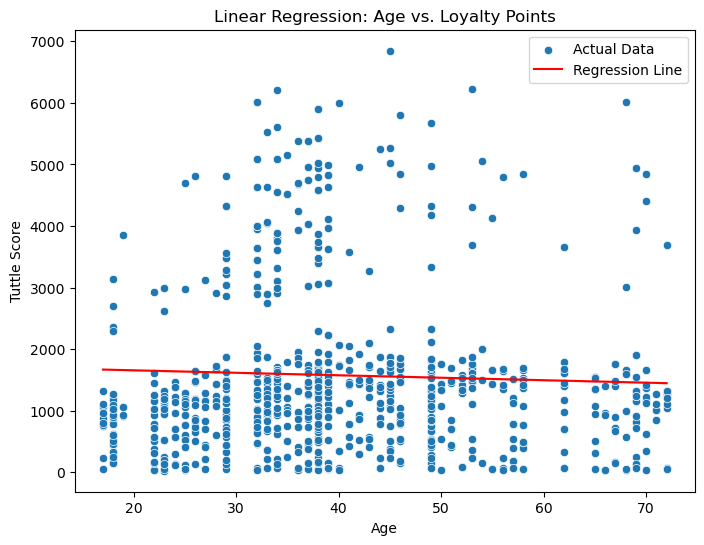

In [36]:
# Plot the graph with a regression line.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='loyalty_points', data=rev_new, label='Actual Data')
sns.lineplot(x=rev_new['age'], y=predicted_values, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs. Loyalty Points')
plt.xlabel('Age')
plt.ylabel('Tuttle Score')
plt.legend()
plt.show()

# Conclusion for linear regression for Age vs. Loyalty Points

1. The R-squared value is 0.002, indicating that only a very small proportion (2.0%) of the variability in "loyalty_points" is explained by the variable "age."
2. The Adjusted R-squared is also very low at 0.001, suggesting that the inclusion of "age" does not improve the model's explanatory power.
3. Furthermore, regression model is not statistically significant as p-value (0.0577) is greater than common significance level of 0.05.
4. The variable "age" does not appear to have a statistically significant effect on "loyalty_points," based on its coefficient ( -0.042445)and p-value.
5. The negative sign indicates a slight tendency for older individuals to have slightly lower loyalty points, but the correlation is weak.

# Multiple linear regression 

Set the variables, fitting the model, and calling the predictions for X

In [37]:
# Define the dependent variable.
y = rev_new['loyalty_points']  

# Define the independent variables.
X = rev_new[['turtle_score', 'income_per_y', 'age']] #model with 3 variables

In [38]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y)

LinearRegression()

In [39]:
# Call the predictions for X (array).
mlr.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

# Check the value of R-squared, the intercept, and the coefficients

In [40]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))

R-squared:  0.8399114912748795
Intercept:  -2203.059751307901
Coefficients:


[('turtle_score', 34.18319657763366),
 ('income_per_y', 34.008385492602486),
 ('age', 11.060658711843365)]

# Train and test subsets with (MLR) multiple linear regression

In [41]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [42]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [43]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:09:29   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2203.3411     58.253    -37.824   

# MLR Regression Result Summary

1. Prob (F-statistic) is 0, what suggest that model is valid.
2. Probability is 0 for all variables, what suggest that variables are significant.
3. Since coef for age is significantly weaker than for turtle score and loyalty points, as well as linear regression show weak correlation, I will forcus on correlation between turtle score and loyalty points.
4. All variables represent positive correlation, meaning that increasing turtle_score by 1 unit, the loyalty points increase by 34.2 units; similarly, when we increase income_per_y by 1 unit, the loyalty points increase by 33.6.
5. Initial result shows no multicollinearity as all variables are significant, but this result should be further tested.

# Regression test - training and testing the model

In [44]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X_train, Y_train)

LinearRegression()

In [45]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr))

Prediction for train set: [ 1362.93474067   767.56846704  2292.11541031 ...  1416.57825601
 -1096.31139624  1531.78396384]


In [46]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 1.39464002e+03  3.42722127e+03  1.64827702e+03  1.73471263e+03
  8.78436414e+02  1.10385877e+03  3.37583217e+03  1.17368074e+03
  3.24736342e+03  2.23180070e+03 -2.44944699e+02  4.10358129e+02
  2.12783527e+02  9.63165267e+02  1.28320189e+03  1.77257837e+03
 -1.43799603e+02  1.63483668e+03  3.18353398e+03  2.04590612e+03
  1.60641528e+03  2.11803797e+03  1.46031816e+03 -7.21777196e+02
  4.39477305e+03  2.96179966e+03  3.42723600e+03  1.34009235e+03
 -4.44661239e+02  1.33626775e+03  1.41790286e+03  4.58138911e+03
  1.29316633e+03  3.83420234e+03  1.27602323e+03  1.88201997e+03
  5.94541904e+01  4.00594554e+02  2.19418054e+03  6.28463350e+02
  1.50093432e+03  8.28366550e+02  1.08041516e+03  1.63483668e+03
 -8.60817496e+02  1.34238749e+03  1.10249534e+03  1.42146714e+03
 -9.54686183e+02  1.92394653e+03  1.37765359e+03 -8.54393252e+02
  2.97230292e+03  1.65861425e+03 -2.56101162e+02  1.57640549e+03
  1.50963897e+03  1.36293474e+03  1.40406027e+03  3.96782965e+03


In [47]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)

85.30503881630669


# Check for multicollinearity with Python

In [48]:
# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))

   VIF Factor      features
0       21.29         const
1        1.06  turtle_score
2        1.00  income_per_y
3        1.05           age


# Evaluating the model

In [49]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error (Final): 425.4867962759565
Mean Square Error (Final): 301956.03907853214


# Conclusion

1. Since VIF factor over 10 in generally considered high, as the constant term has VIF = 21.29, we can conclude that there might me high multicollinearity among the independent variables in model.
2. Although VIF for individual variables is low and suggest no concern for multicollinearity, it would be advisable to investigate the correlation structure of your predictor variables, especially focusing on why the constant term might be showing high collinearity.
3. Considering 0 being a benchmark for perfection in Mean Absolute Error and Mean Square Error, sice both results are far from 0, this also suggest multicollinearity between variables.
4. Further nvestigation into the nature of correlation should be considered to improve the model.

# Clustering with k-means using Python

# Load and explore the data

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews_new.csv')

# View DataFrame.
df2.head()

,gender,age,income_per_y,turtle_score,loyalty_points,summary
0,Male,18,12.30,39,210,The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,"pretty, but also pretty useless"
3,Female,25,13.12,77,562,Five Stars
4,Female,33,13.94,40,366,Money trap


In [52]:
# Drop unnecessary columns.
df2_new = df2.drop(['summary'], axis=1)

# View DataFrame.
print(df2_new.head())

   gender  age  income_per_y  turtle_score  loyalty_points
0    Male   18         12.30            39             210
1    Male   23         12.30            81             524
2  Female   22         13.12             6              40
3  Female   25         13.12            77             562
4  Female   33         13.94            40             366


In [53]:
# Explore data.
df2_new.info()

# Descriptive statistics.
df2_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income_per_y    2000 non-null   float64
 3   turtle_score    2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 78.3+ KB


,age,income_per_y,turtle_score,loyalty_points
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000
std,13.573212,23.123984,26.094702,1283.239705
min,17.000000,12.300000,1.000000,25.000000
25%,29.000000,30.340000,32.000000,772.000000
50%,38.000000,47.150000,50.000000,1276.000000
75%,49.000000,63.960000,73.000000,1751.250000
max,72.000000,112.340000,99.000000,6847.000000


Female    1120
Male       880
Name: gender, dtype: int64


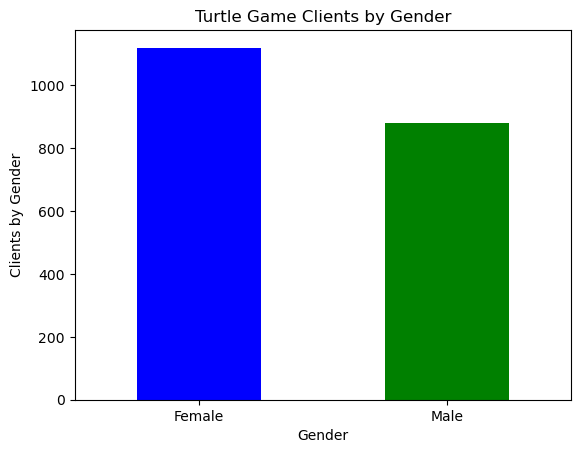

In [54]:
# Counting males and females
gender_counts = df2_new['gender'].value_counts()

print(gender_counts)

# Plotting
gender_counts.plot(kind='bar', color=['blue', 'green'])  # Blue for Male, Green for Female
plt.title('Turtle Game Clients by Gender')
plt.xlabel('Gender')
plt.ylabel('Clients by Gender')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Visualise the data

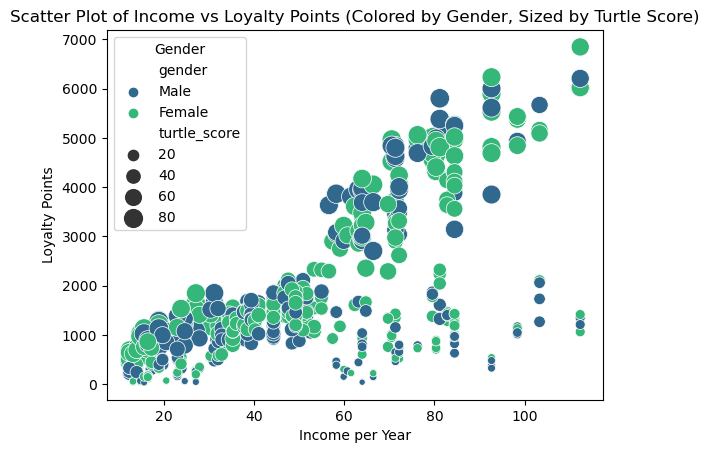

In [55]:
# Scatter plot of remuneration versus spending score
sns.scatterplot(x='income_per_y',
                y='loyalty_points',
                data=df2_new,
                hue='gender',
                palette='viridis',
                size='turtle_score',
                sizes=(20, 200))

# Set plot title and labels
plt.title('Scatter Plot of Income vs Loyalty Points (Colored by Gender, Sized by Turtle Score)')
plt.xlabel('Income per Year')
plt.ylabel('Loyalty Points')

# Show the legend
plt.legend(title='Gender')

# Show the plot
plt.show()

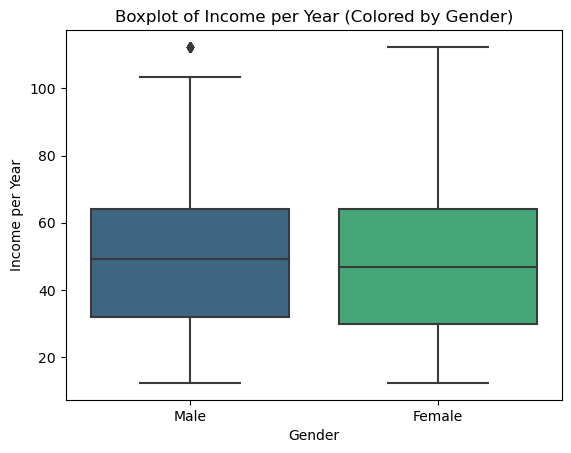

In [56]:
# Boxplot of income per year, colored by gender
sns.boxplot(x='gender',
            y='income_per_y',
            data=df2_new,
            palette='viridis')

# Set plot title and labels
plt.title('Boxplot of Income per Year (Colored by Gender)')
plt.xlabel('Gender')
plt.ylabel('Income per Year')

# Show the plot
plt.show()

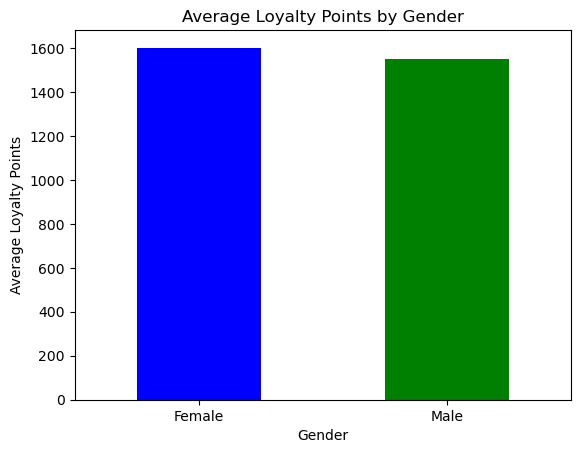

In [57]:
# Grouping by gender and calculating mean loyalty points
loyalty_by_gender = df2_new.groupby('gender')['loyalty_points'].mean()

# Plotting
loyalty_by_gender.plot(kind='bar', color=['blue', 'green'])  # Blue for Male, Pink for Female
plt.title('Average Loyalty Points by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Loyalty Points')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [58]:
# Grouping by gender and calculating min, max, and mean loyalty points
loyalty_stats_by_gender = df2_new.groupby('gender')['loyalty_points'].agg(['min', 'max', 'mean'])

print(loyalty_stats_by_gender)

        min   max         mean
gender                        
Female   30  6847  1601.166964
Male     25  6208  1548.587500


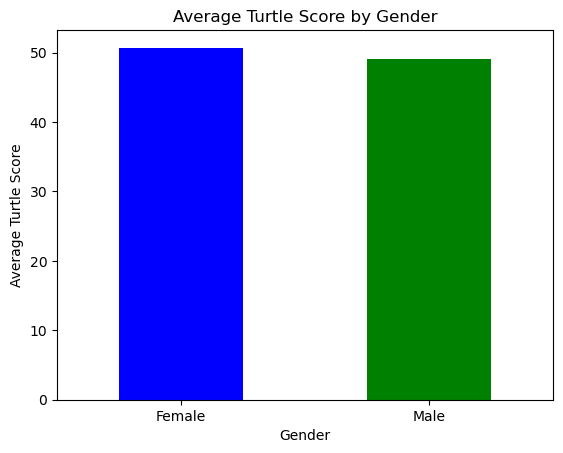

In [59]:
# Grouping by gender and calculating mean loyalty points
loyalty_by_gender = df2_new.groupby('gender')['turtle_score'].mean()

# Plotting
loyalty_by_gender.plot(kind='bar', color=['blue', 'green'])  # Blue for Male, Pink for Female
plt.title('Average Turtle Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Turtle Score')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In [60]:
# Grouping by gender and calculating min, max, and mean turtle_score
turtle_score_by_gender = df2_new.groupby('gender')['turtle_score'].agg(['min', 'max', 'mean'])

print(turtle_score_by_gender)

        min  max       mean
gender                     
Female    1   99  50.691071
Male      1   99  49.120455


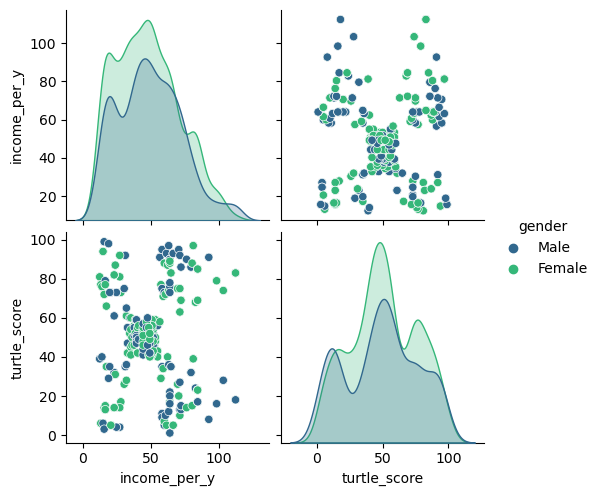

In [61]:
# Create a pairplot with Seaborn.
x = df2_new[['income_per_y', 'turtle_score']]

sns.pairplot(df2_new,
             vars=x,
             hue='gender',
             diag_kind='kde',
            palette='viridis')

# Elbow and silhoutte methods - Elbow method

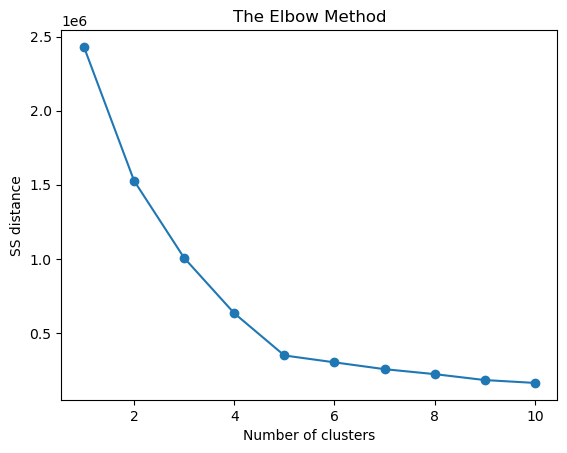

In [62]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

# The silhouette method

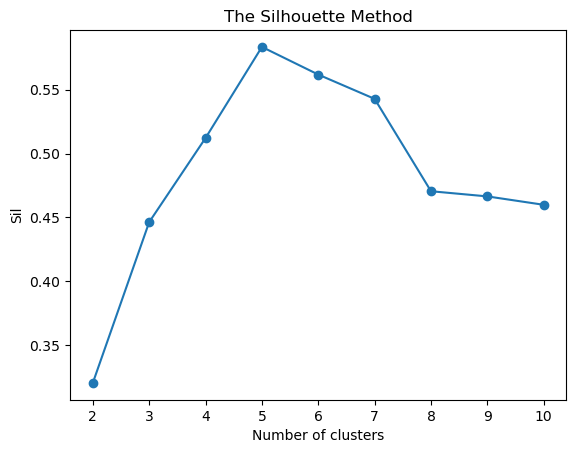

In [63]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# Explain which value might give you the best clustering.

The Elbow and The Silhouette methods indicate that five clusters in optimal number of clusters for this model. Next step is to evaluate this option.

# Evaluate k-means model at different values of k

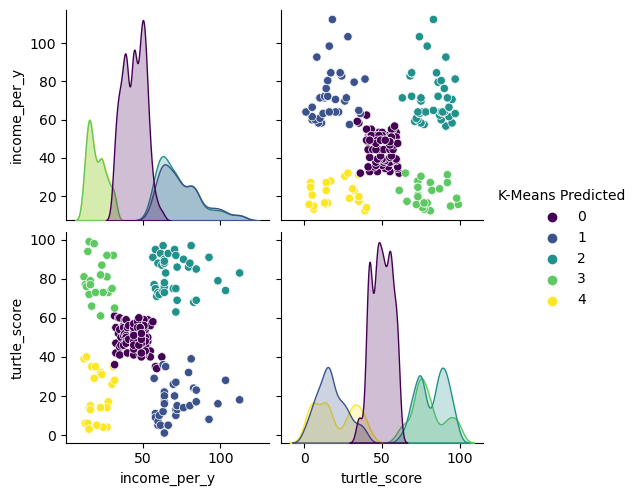

In [64]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='viridis')

In [65]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
1    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

In [66]:
# View the K-Means predicted.
print(x.head())

   income_per_y  turtle_score  K-Means Predicted
0         12.30            39                  4
1         12.30            81                  3
2         13.12             6                  4
3         13.12            77                  3
4         13.94            40                  4


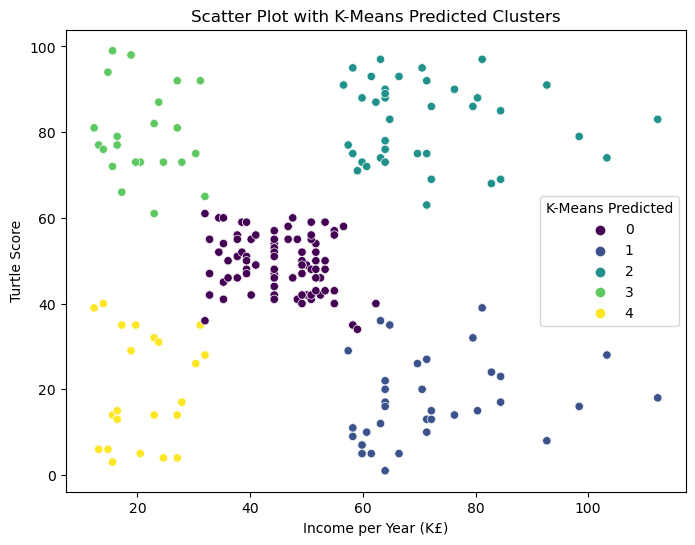

In [67]:
# Scatter plot for 'income_per_y' vs 'turtle_score'.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_per_y', y='turtle_score', hue='K-Means Predicted', data=x, palette='viridis')

# Add labels and title
plt.xlabel('Income per Year (K£)')
plt.ylabel('Turtle Score')
plt.title('Scatter Plot with K-Means Predicted Clusters')

# Show the legend
plt.legend(title='K-Means Predicted')

# Show the plot
plt.show()

In [68]:
# Calculating descriptive statistics for the variables income_per_y and turtle_score within each cluster (0, 1, 2, 3, 4),
# byusing 'groupby' and 'describe' method.

In [69]:
# Define the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, 
                max_iter=15000,
                init='k-means++',  # You can also try other initialization methods
                random_state=0)

# Fit the model to your data
clusters = kmeans.fit_predict(x)

# Add the cluster labels to your DataFrame
x['K-Means Predicted'] = clusters

# Group the data by 'K-Means Predicted' (cluster labels) and calculate descriptive statistics
cluster_stats = x.groupby('K-Means Predicted')[['income_per_y', 'turtle_score']].describe()

# Print the descriptive statistics for each cluster
print(cluster_stats)

                  income_per_y                                             \
                         count       mean        std    min    25%    50%   
K-Means Predicted                                                           
0                        774.0  44.418786   7.088279  31.98  38.54  44.28   
1                        330.0  74.831212  13.638540  57.40  63.96  71.34   
2                        356.0  73.240281  13.557856  56.58  63.14  71.34   
3                        269.0  20.353680   5.737253  12.30  15.58  19.68   
4                        271.0  20.424354   5.719723  12.30  15.58  19.68   

                                 turtle_score                              \
                     75%     max        count       mean        std   min   
K-Means Predicted                                                           
0                  50.02   62.32        774.0  49.529716   6.484414  34.0   
1                  82.82  112.34        330.0  17.424242   9.515402   1.0  

In [70]:
# Use six clusters to compare distribution of points as alternative to 5 clusters

# for the purpose of analysis leaving this syntax inactive as I have decided to use 5 clusters for further demonstration.

#kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

#clusters = kmeans.labels_

#x['K-Means Predicted'] = clusters

# Plot the predicted.
#sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde',
             palette='viridis')

IndentationError: unexpected indent (834739569.py, line 3)

In [ ]:
# Check the number of observations per predicted class.
#x['K-Means Predicted'].value_counts()

In [ ]:
# View the K-Means predicted.
#print(x.head())

# Justify your selection, and comment on the respective cluster sizes of your final solution

As in case of this scenario we don't know the actual number of distinct groups, the choice of k-clustering is subjective, however, judging by results for 5 and 6 groups represented on the elbow chart and pairplots, 5 clusters display better balance in the distribution of observations across clusters, suggesting more robust and reliable clustering.

Also silhouette score is higher for 5 (higher silhouette coefficient), than 6 clusters.

5 clusters has more data reduction than 6 clusters, they are easily distinct and interpretable.

Number of objects in 5 clusters, judging by K-Means, is more balanced than in 6 clusters that may result in overfitting.

Predictions for cluster membership shows that within 5 clusters both attributes (income_per_y and turtle_score) will belng to cluster 1 (lower results), or cluster 4 (higher results).

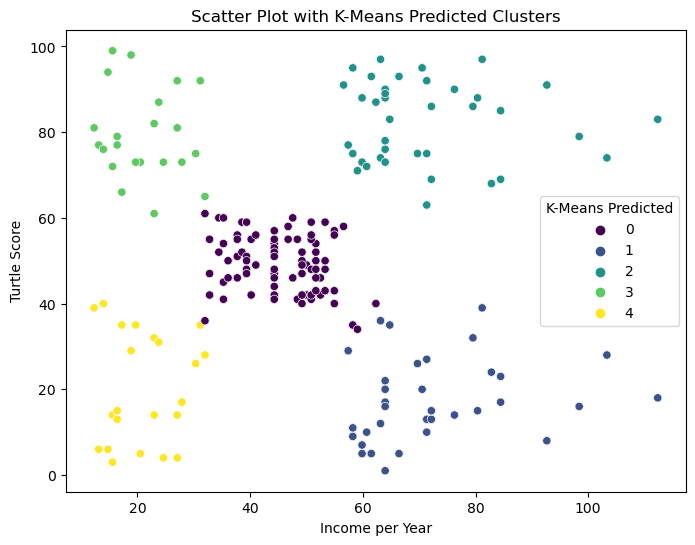

In [71]:
# Scatter plot for 'income_per_y' vs 'turtle_score'.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income_per_y', y='turtle_score', hue='K-Means Predicted', data=x, palette='viridis')

# Add labels and title
plt.xlabel('Income per Year')
plt.ylabel('Turtle Score')
plt.title('Scatter Plot with K-Means Predicted Clusters')

# Show the legend
plt.legend(title='K-Means Predicted')

# Show the plot
plt.show()

# Conclusion

Conclusions based on choice of 5 cluster model:

Cluster 0: Average income_per_y: £44,419, average turtle_score: 49.53, customers with moderate income and moderate spending scores.

Cluster 1: Average income_per_y: £74,831, average turtle_score: 17.42, average turtle_score: 19.76, customers with relatively high income but lower spending scores.

Cluster 2: Average income_per_y: £73,240, average turtle_score: 82.01, average turtle_score: 16.42, customers with relatively high income and high spending scores.

Cluster 3: Average income_per_y: £20,354, average turtle_score: 79.42, customers with low to moderate income but high spending scores.

Cluster 4: Average income_per_y: £20,424, average turtle_score: 19.76, customers with low to moderate income and low spending scores.

The clusters exhibit diverse income and spending behaviors, representing different customer segments within the dataset.

Cluster 0 is the largest group, comprising 774 observations, followed by Cluster 2 with 356 observations. Clusters 1, 3, and 4 are relatively smaller, with 330, 269, and 271 observations, respectively.

The disproportionately large size of Cluster 0 suggests that it represents a significant portion of our customer base.

Analysis of customer reviews - NLP

In [72]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews.csv')

# View DataFrame.
print(df3)

      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  produ

In [74]:
# Retaining only review and summary columns for analysis purposes
selected_columns = ['review', 'summary']
df_extracted = df3[selected_columns]

# Viewing DataFrame
print(df_extracted)

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

In [75]:
# Check for missing values in df3
missing_values = df3.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


There are no missing values in DataFrame

In [76]:
# Check if there are any missing values in the entire DataFrame
any_missing = df3.isnull().any().any()

# Display the result
print(f"Are there any missing values? {any_missing}")

Are there any missing values? False


In [77]:
# Keep necessary columns. Drop unnecessary columns.
# Drop unnecessary columns.
df3_new = df3.drop(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
                    'loyalty_points', 'education',
                   'language', 'platform'], axis=1)

# View column names.
print(df3_new.head())

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap  


In [78]:
# Calculate the number of entries in the 'summary' column
comments_count = df3_new['summary'].count()

# Calculate the number of entries in the 'reviews' column
reviews_count = df3_new['review'].count()

print("Number of entries in the 'summary' column:", comments_count)
print("Number of entries in the 'review' column:", reviews_count)

Number of entries in the 'summary' column: 2000
Number of entries in the 'review' column: 2000


Prepare the data for NLP

2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [79]:
# Importing string
import string

# Convert text to lower case and join elements in the "review" column
df3['review'] = df3['review'].str.lower()

# Convert text to lower case and join elements in the "summary" column
df3['summary'] = df3['summary'].str.lower()

2b) Replace punctuation in each of the columns respectively (review and summary)

In [80]:
# Replace punctuation in the "review" column
df3['review'] = df3['review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Replace punctuation in the "summary" column
df3['summary'] = df3['summary'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

2c) Drop duplicates in both columns

In [81]:
# Drop duplicates in both "review" and "summary" columns
df3 = df3.drop_duplicates(subset=['review', 'summary'])

# Reset index after dropping duplicates
df3 = df3.reset_index(drop=True)

df3 contains now the preprocessed data ready for further analysis using NLP techniques.

Tokenise and create wordclouds - Reviews column

In [82]:
# Tokenise the words in review column.
df3['tokens_r'] = df3['review'].apply(word_tokenize)

# Preview data.
df3['tokens_r'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_r, dtype: object

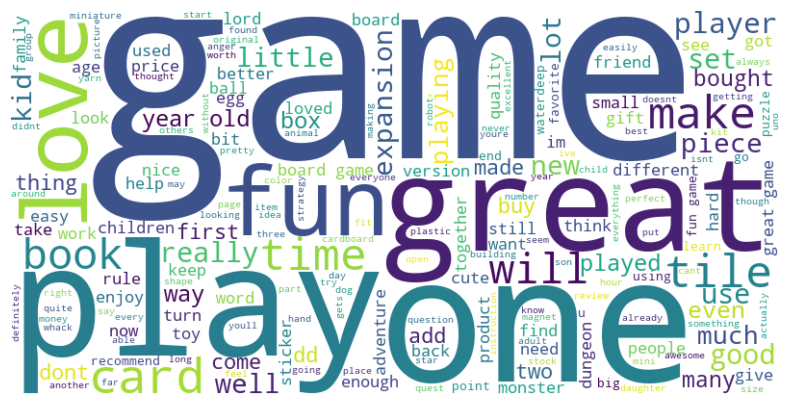

In [83]:
# Removing stopwords and visualising review column data by Wordcloud 
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Concatenate the tokens into a single string
tokens_r_string = ' '.join(df3['tokens_r'].explode().astype(str))

# Generate WordCloud for review column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_r_string)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Create frequency distribution - Review Column

In [84]:
# Flatten the list of lists into a single list
all_tokens = [token for tokens_list in df3['tokens_r'] for token in tokens_list]

# Create FreqDist for the tokens
fdist1 = FreqDist(all_tokens)

# Preview the data.
fdist1

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

Count the top 15 words that appear most often in reviews

In [85]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
top_r = pd.DataFrame(Counter(all_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
top_r

,Frequency
Word,
the,5451
and,3233
to,3162
a,3160
of,2488
i,2090
it,2083
is,1782
this,1776


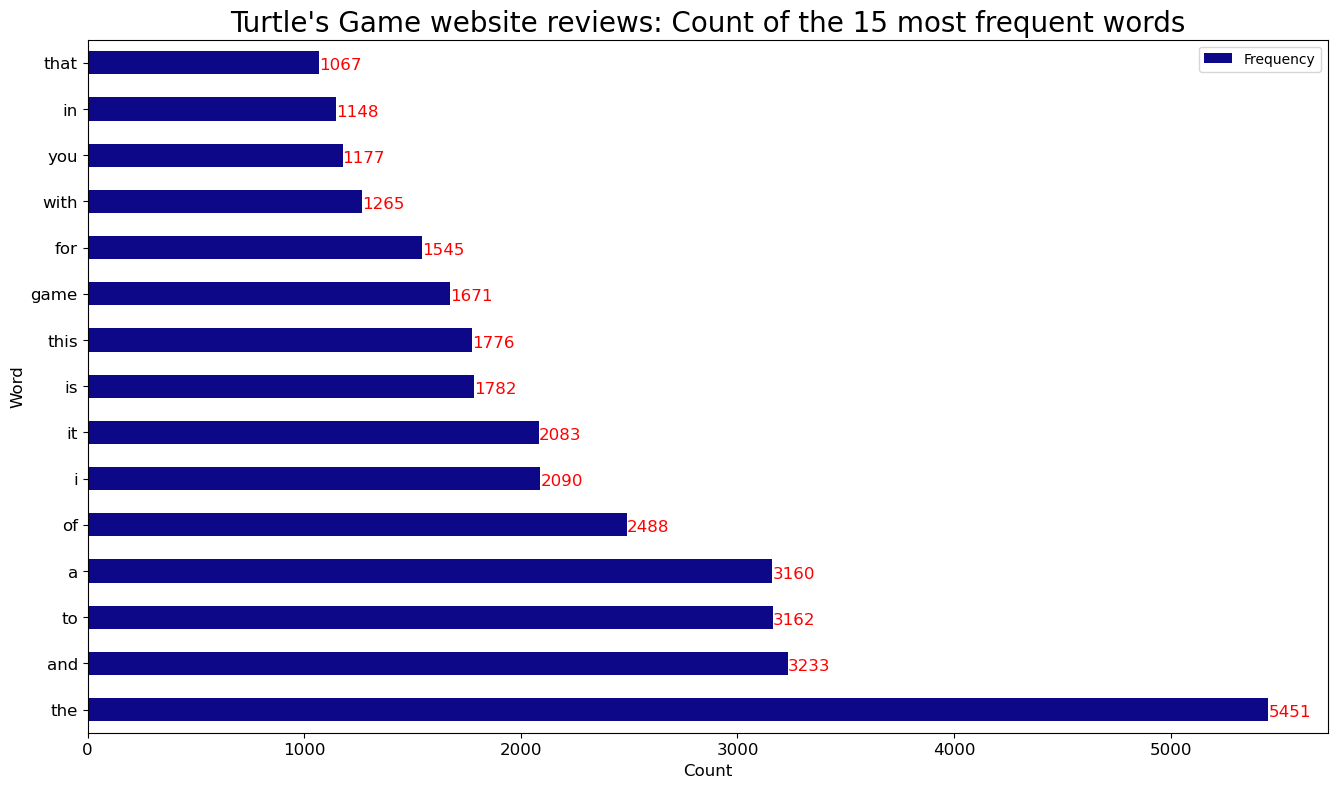

In [86]:
# Visulising list of 15 most frequently used words by bar plot
# Set the plot type.
ax = top_r.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Turtle's Game website reviews: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

Tokenise and create wordclouds - Summary column

In [87]:
# Tokenise the words in review column.
df3['tokens_s'] = df3['summary'].apply(word_tokenize)

# Preview data.
df3['tokens_s'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_s, dtype: object

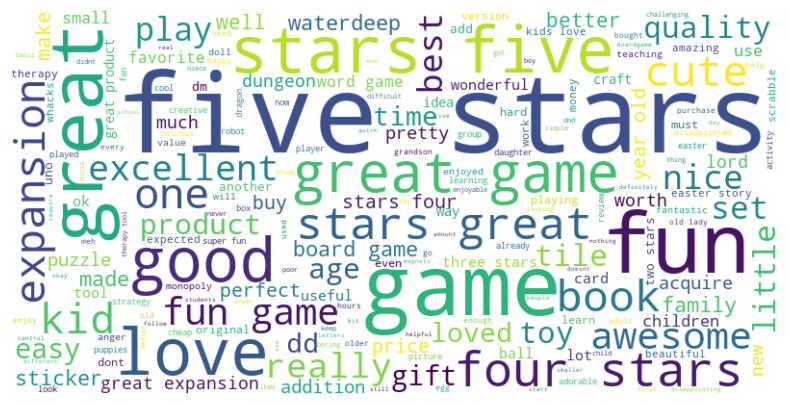

In [88]:
# Removing stopwords and visualising summary column data by Wordcloud 
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Concatenate the tokens into a single string
tokens_s_string = ' '.join(df3['tokens_s'].explode().astype(str))

# Generate WordCloud for summary column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tokens_s_string)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Frequency and count the top 15 words that appear most often in summary column

In [89]:
# Flatten the list of tokens for the 'summary' column
summary_tokens = [token.lower() for tokens_list in df3['tokens_s']
                  for token in tokens_list if token.lower()
                  not in english_stopwords and token.isalpha()]

# Use Counter to get the 15 most common words and their frequencies
top_s = pd.DataFrame(Counter(summary_tokens).most_common(15),
                              columns=['Word', 'Frequency']).set_index('Word')

# Preview data
top_s

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


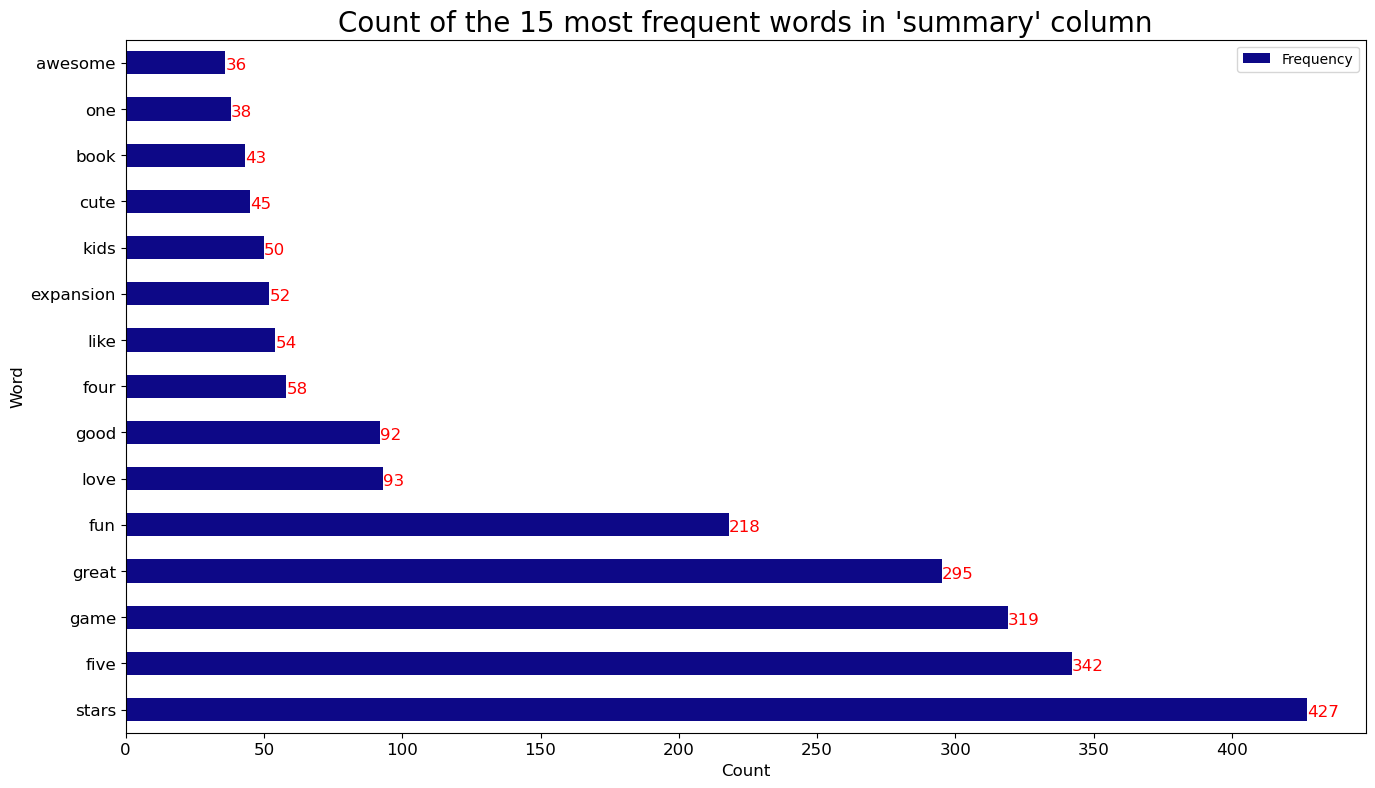

In [90]:
# Plot the bar chart
ax = top_s.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Count of the 15 most frequent words in 'summary' column", fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, str(round(i.get_width(), 2)),
            fontsize=12, color='red')

plt.show()

In [91]:
# Count occurrences of 'five' and 'stars' in summary column
five_stars_count = sum(1 for i in range(len(summary_tokens)-1) if summary_tokens[i:i+2] == ['five', 'stars'])

# View the answer
print("The combination 'five stars' occurs {} times in the summary column.".format(five_stars_count))

The combination 'five stars' occurs 340 times in the summary column.


Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [92]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [93]:
# import the prebuilt rules and values of the vader lexicon.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alicja.walaszek\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [94]:
# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a variable sia to store the SentimentIntensityAnalyser() method.
sia = SentimentIntensityAnalyzer()

Sentiment in Review column

In [95]:
# Determine polarity of review column
# Apply sentiment analysis to each review and create a new column 'polarity_rev'
df3['polarity_rev'] = df3['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the DataFrame with the new 'polarity' column
print(df3[['review', 'polarity_rev']])

                                                 review  polarity_rev
0     when it comes to a dms screen the space on the...       -0.6333
1     an open letter to galeforce9\n\nyour unpainted...        0.9404
2     nice art nice printing  why two panels are fil...       -0.0045
3     amazing buy bought it as a gift for our new dm...        0.8860
4     as my review of gf9s previous screens these we...       -0.6808
...                                                 ...           ...
1956  the perfect word game for mixed ages with mom ...        0.9137
1957  great game  did not think i would like it when...        0.8606
1958          great game for all\nkeeps the mind nimble        0.6249
1959                                           fun game        0.5106
1960  this game is fun a lot like scrabble without a...        0.5209

[1961 rows x 2 columns]


In [96]:
# The describe function on the compound will show the distribution for sentiment in reviews. 
sentiment_description_rev = df3['polarity_rev'].describe()

# Display the summary statistics
print(sentiment_description_rev)

count    1961.000000
mean        0.636398
std         0.400515
min        -0.991300
25%         0.518700
50%         0.788100
75%         0.907300
max         0.999600
Name: polarity_rev, dtype: float64


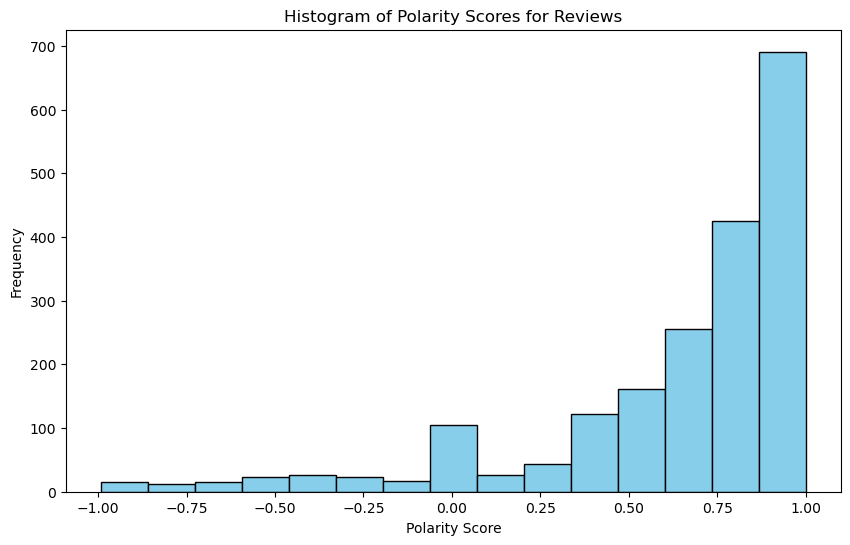

In [97]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10, 6))
plt.hist(df3['polarity_rev'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Polarity Scores for Reviews')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

In [98]:
# Creating DataFrame for 20 most positive polarity scores in reviews
top_positive_reviews = df3.sort_values('polarity_rev', ascending=False).head(20)

# Display the top 20 reviews with the highest positive polarity
print(top_positive_reviews[['review', 'polarity_rev']])

                                                 review  polarity_rev
1105  disclaimer bought this from a local store paid...        0.9996
869   whenever i see this game on my shelf i get a d...        0.9995
1636  if you only employ one creativityenhancing res...        0.9992
1542  as a dad of two boys im always on the lookout ...        0.9991
847   i grew up playing monopoly  lots of people did...        0.9989
356   this kit is awesome my 5year old daughter and ...        0.9988
1276  lords of waterdeep was awesome and scoundrels ...        0.9988
1337  lords of waterdeep scoundrels of skullport is ...        0.9984
918   wrath of ashardalon gets everything right for ...        0.9976
1057  we own this game as well as castle ravenloft  ...        0.9976
826   i dont know if ive ever taken more delight rea...        0.9974
1047  if you are a fan of dungeons and dragons or ot...        0.9973
1100  the short short version wrath of ashardalon is...        0.9972
1779  monopoly is fu

In [99]:
# Creating DataFrame for 20 most negative polarity scores in reviews
top_negative_reviews = df3.sort_values('polarity_rev').head(20)

# Display the top 20 reviews with the lowest (most negative) polarity
print(top_negative_reviews[['review', 'polarity_rev']])

                                                 review  polarity_rev
1103  here is my review crossposted from boardgamege...       -0.9913
1531  the one ring is a very innovative rpg set in m...       -0.9696
1053  for those just getting started in the dnd worl...       -0.9539
280   i bought this thinking it would be really fun ...       -0.9520
1001  i wish id watched some of the gameplay videos ...       -0.9461
361   i found that this card game does the opposite ...       -0.9349
891   acquire is a great game of luck strategy and l...       -0.9194
321   i am completely shocked by all of the positive...       -0.9152
452   this is a fun game for kids its basically the ...       -0.9146
872   a crappy cardboard ghost of the original  hard...       -0.9052
889   the game is amazing\nthe new version is not\nc...       -0.8984
1131  i dig this its a shame that 56 years ago i was...       -0.8863
785   my mom already owned an acquire game but she a...       -0.8852
1766  the ball of wh

In [100]:
# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Add a new column for sentiment polarity
df3_new['sentiment'] = df3_new['review'].apply(get_sentiment)

# Group by product and calculate average sentiment polarity
product_sentiment = df3_new.groupby('product')['sentiment'].mean()

# Sort products based on average sentiment polarity
most_positive_products = product_sentiment.sort_values(ascending=False)

print("Most positive products based on average sentiment polarity:")
print(most_positive_products)

Most positive products based on average sentiment polarity:
product
9119     0.485984
9080     0.444396
11004    0.411568
3158     0.409383
4619     0.404173
           ...   
2795     0.047544
4399     0.036642
9597     0.035130
3436     0.011848
6431     0.001382
Name: sentiment, Length: 200, dtype: float64


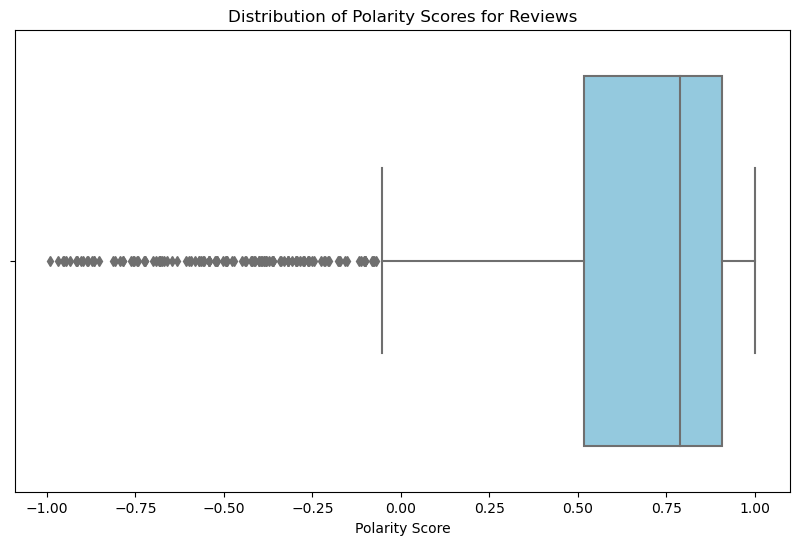

In [101]:
# Boxplot helps to visualise balance between positive and negative sentiment in review column
# The boxplot shows how many values sit on the edges as outliers in reviews column.
import seaborn as sns
import matplotlib.pyplot as plt

# Plot polarity scores for reviews
plt.figure(figsize=(10, 6))

# Create a boxplot for the distribution of polarity scores
sns.boxplot(x='polarity_rev', data=df3, color='skyblue')

# Set labels and title
plt.title('Distribution of Polarity Scores for Reviews')
plt.xlabel('Polarity Score')

# Show the plot
plt.show()

The range of the sentiment scores vary from -0.9913 to 0.9996 for total of 1961 reviews, indicating a wide range of sentiments expressed in the reviews. This suggests that the reviews cover a spectrum of opinions, from highly negative to highly positive.

Mean score of 0.636 indicates that, on average, the reviews tend to be possitive.

Sentimenty in Summary column

In [102]:
# Determine polarity of summary column
# Apply sentiment analysis to each comment and create a new column 'polarity_com'
df3['polarity_com'] = df3['summary'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Display the DataFrame with the new 'polarity_com' column
print(df3[['summary', 'polarity_com']])

                                                summary  polarity_com
0     the fact that 50 of this space is wasted on ar...       -0.0711
1     another worthless dungeon masters screen from ...       -0.4404
2                        pretty but also pretty useless        0.4019
3                                            five stars        0.0000
4                                            money trap       -0.3182
...                                                 ...           ...
1956      the perfect word game for mixed ages with mom        0.5719
1957                                          super fun        0.8020
1958                                         great game        0.6249
1959                                         four stars        0.0000
1960                                     love this game        0.6369

[1961 rows x 2 columns]


In [103]:
# The describe function on the compound will show the distribution for sentiment in comments. 
sentiment_description_com = df3['polarity_com'].describe()

# Display the summary statistics
print(sentiment_description_com)

count    1961.000000
mean        0.312716
std         0.343742
min        -0.905200
25%         0.000000
50%         0.421500
75%         0.624900
max         0.952400
Name: polarity_com, dtype: float64


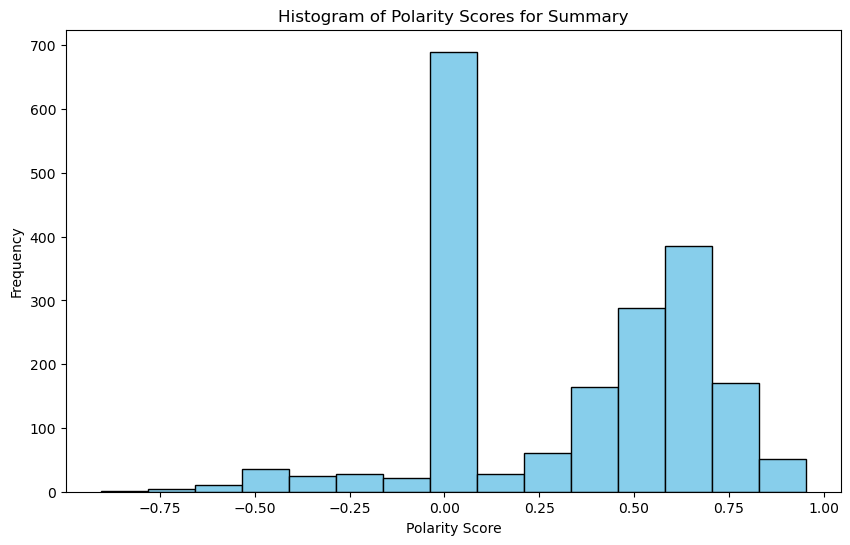

In [104]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
plt.figure(figsize=(10, 6))
plt.hist(df3['polarity_com'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Polarity Scores for Summary')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()

In [105]:
# Creating DataFrame for 20 most positive polarity scores in summary
top_positive_comments = df3.sort_values('polarity_com', ascending=False).head(20)

# Display the top 20 reviews with the highest positive polarity
print(top_positive_comments[['summary', 'polarity_com']])

                                                summary  polarity_com
1182  wow what a great set of tiles for such a great...        0.9524
1105  wrath of ashardalon great investment for an av...        0.9186
1669  great for playing great for creative workshops...        0.9169
1917                    easy to learn great fun to play        0.9136
1518   loves stickers and she loves peppa so this wa...        0.9074
695   great quality very cute and perfect for my tod...        0.9073
484   but the kids really like it and helps start go...        0.8988
1170       great game value for the price is great also        0.8910
1015                             great game great value        0.8910
962   i wish all those who buy better luck fairly ea...        0.8885
1839  easy fun fast and thoroughly enjoyable for adu...        0.8883
1469  he loves construction vehicles so i am sure he...        0.8880
1506  excellent stickers my grand daughter loves pep...        0.8860
1814                

In [106]:
# Creating DataFrame for 20 most negative polarity scores in summary
top_negative_reviews = df3.sort_values('polarity_com').head(20)

# Display the top 20 reviews with the lowest (most negative) polarity
print(top_negative_reviews[['summary', 'polarity_com']])

                                                summary  polarity_com
872   a crappy cardboard ghost of the original  hard...       -0.9052
937                                     no 20 sided die       -0.7269
1537  the tardis the doctor river song amy rory figh...       -0.7269
326                                   defective poor qc       -0.7184
991   then you will find this board game to be dumb ...       -0.6808
1148  before this i hated running any rpg campaign d...       -0.6369
420   but it gets repetitive and the students start ...       -0.6310
837        worst quality adult board game ive even seen       -0.6249
1453  adds a needed amount of tension in a tense fan...       -0.5719
362                                  anger control game       -0.5719
523                                  anger control game       -0.5719
780         great game but lazy and boring board design       -0.5647
880                        bad qualityall made of paper       -0.5423
875            too b

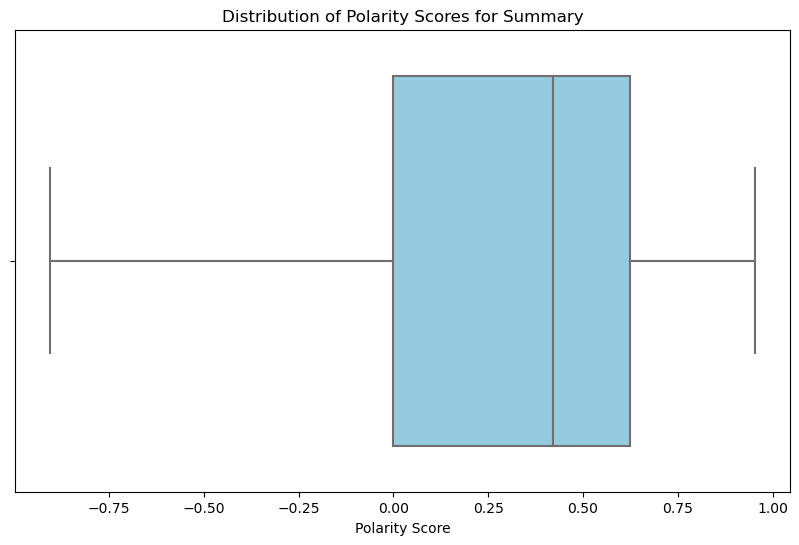

In [107]:
# Boxplot helps to visualise balance between positive and negative sentiment in summary column
# The boxplot shows how many values sit on the edges as outliers in summary column.
import seaborn as sns
import matplotlib.pyplot as plt

# Plot polarity scores for reviews
plt.figure(figsize=(10, 6))

# Create a boxplot for the distribution of polarity scores
sns.boxplot(x='polarity_com', data=df3, color='skyblue')

# Set labels and title
plt.title('Distribution of Polarity Scores for Summary')
plt.xlabel('Polarity Score')

# Show the plot
plt.show()

In [108]:
# Combining counts of positive ane negative sentiment for review and summary columns

# Calculating sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to 'review' column and create a new column 'review_sentiment'
df3['review_sentiment'] = df3['review'].apply(get_sentiment)

# Apply sentiment analysis to 'summary' column and create a new column 'summary_sentiment'
df3['summary_sentiment'] = df3['summary'].apply(get_sentiment)

# Count positive and negative comments in 'review' column
review_sentiment_counts = df3['review_sentiment'].value_counts()

# Count positive and negative comments in 'summary' column
summary_sentiment_counts = df3['summary_sentiment'].value_counts()

In [109]:
# Calculate total counts for positive, negative, and neutral sentiments for both columns
total_positive_review = review_sentiment_counts.get('positive', 0)
total_negative_review = review_sentiment_counts.get('negative', 0)
total_neutral_review = review_sentiment_counts.get('neutral', 0)

total_positive_summary = summary_sentiment_counts.get('positive', 0)
total_negative_summary = summary_sentiment_counts.get('negative', 0)
total_neutral_summary = summary_sentiment_counts.get('neutral', 0)

In [110]:
print("Total positive reviews:", total_positive_review)
print("Total negative reviews:", total_negative_review)
print("Total neutral reviews:", total_neutral_review)
print("Total positive summaries:", total_positive_summary)
print("Total negative summaries:", total_negative_summary)
print("Total neutral summaries:", total_neutral_summary)

Total positive reviews: 1577
Total negative reviews: 303
Total neutral reviews: 81
Total positive summaries: 1058
Total negative summaries: 192
Total neutral summaries: 711


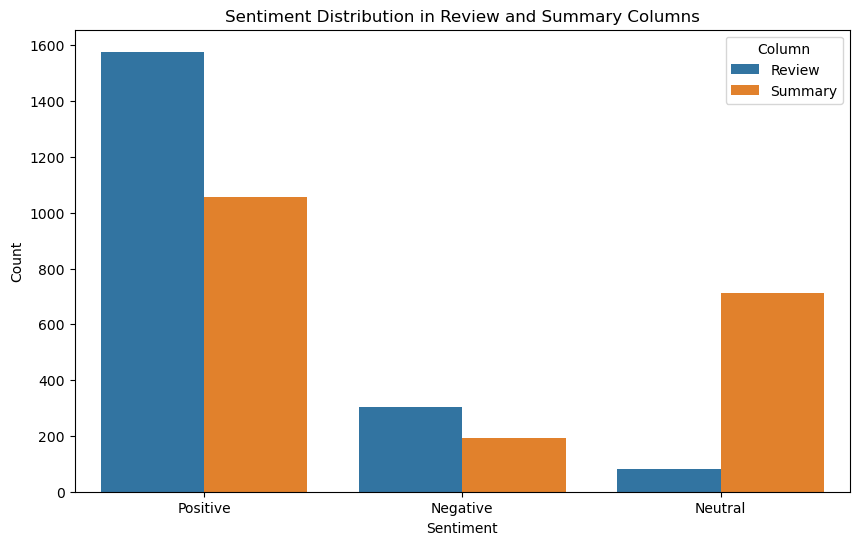

In [111]:
# Crearting visualisation for result of positive and negative sentiments in review and summary columns

# Specify data
sentiment_distribution = {
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Review': [total_positive_review, total_negative_review, total_neutral_review],
    'Summary': [total_positive_summary, total_negative_summary, total_neutral_summary]
}

# Create DataFrame
all_sentiments = pd.DataFrame(sentiment_distribution)

# Melt the DataFrame to long format
all_sentiments_melted = all_sentiments.melt(id_vars='Sentiment', var_name='Column', value_name='Count')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=all_sentiments_melted, x='Sentiment', y='Count', hue='Column')
plt.title('Sentiment Distribution in Review and Summary Columns')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Column')
plt.show()

Overall sentiment scores range from -0.9052 to 0.9524, indicating a broad spectrum of sentiment expressed in the comments.

Mean sentiment score of approximately 0.313 suggests the sentiment expressed in the comments is positive, although to a lesser extent compared to the sentiment in the reviews.

Insights and observations

In both columns - summary and  the reviews column, the standard deviation of 0.401 suggests that there is some variability in the sentiment. This means that while the average sentiment is positive, individual reviews may vary in their degree of positivity or negativity.

Looking at relation of reviews to specific products, product 9119 has the highest average sentiment polarity of 0.486, indicating that it receives very positive reviews on average. Product 6431 has a very low average sentiment polarity of 0.001, suggesting that it receives mostly neutral or negative reviews on average. It would be recommended to look into lowest scoring product to examine improvements and eliminate negative reviews due to product dissatisfaction.

As recommendation to the Turtle Games Marketing Department, I would advise to analyze further the sentiment distribution to identify the aspects of their games that customers appreciate the most, as well as areas of improvement (negative comments).
Marketimng messages can also be tailores specifically to address behaviours of each customer cluster, maximising chances of client engagement.

I would also flag a need to further explore comments that are neutral as  25% of the comments in the dataset have been classified as neutral in sentiment.